In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import re

C:\Users\Lian\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\Lian\anaconda3\lib\site-packages\sklearn\decomposition\_online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:

df = pd.read_csv("news_articles_cleanedv5.txt")
df.head()

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,url,tags,date,content,covid,news_source
0,'It took months to see the end of the tunnel':...,https://www.asiaone.com/lifestyle/it-took-mont...,NIL,05/06/2021,When she first started gymnastics at the age o...,False,Asia One
1,'Everyone watching makes me feel uneasy': Stud...,https://www.asiaone.com/singapore/everyone-wat...,NIL,01/06/2021,"These days, Natasha Osman would sit in front o...",False,Asia One
2,Singapore Mental Health Film Festival 2021 ret...,https://www.asiaone.com/lifestyle/singapore-me...,NIL,18/05/2021,The Covid-19 pandemic has heightened concerns ...,True,Asia One
3,"Woman, 19, rescued after sitting on 27th-floor...",https://www.asiaone.com/singapore/woman-19-res...,NIL,09/04/2021,Residents in Sengkang craned their necks as th...,False,Asia One
4,'I wanted to push the aircon out and jump down...,https://www.asiaone.com/lifestyle/i-wanted-pus...,NIL,09/01/2021,In his 30s and at the peak of his life and car...,False,Asia One


In [3]:
covid = df[df['covid']== True]
covid.head()

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,url,tags,date,content,covid,news_source
2,Singapore Mental Health Film Festival 2021 ret...,https://www.asiaone.com/lifestyle/singapore-me...,NIL,18/05/2021,The Covid-19 pandemic has heightened concerns ...,True,Asia One
9,'Right to disconnect' from work should be cons...,https://www.asiaone.com/singapore/right-discon...,NIL,01/09/2020,Working from home has become a new norm for ma...,True,Asia One
10,"Employer faces $72,000 hospital bill after mai...",https://www.asiaone.com/singapore/employer-fac...,NIL,24/08/2020,"[UPDATE: Aug 26] The employer's son, Goh Meng ...",True,Asia One
11,Domestic worker jumps from Toa Payoh flat afte...,https://www.asiaone.com/singapore/domestic-wor...,NIL,20/08/2020,A domestic helper from Myanmar jumped from the...,True,Asia One
12,Singaporeans working from home more stressed t...,https://www.asiaone.com/lifestyle/singaporeans...,NIL,19/08/2020,If there's one thing that many of us�can�agree...,True,Asia One


In [4]:
kws = ['depression', 'mental illness', 'unalive' , 'social anxiety', 'loneliness',
'stress', 'lonely', 'isolation', 'suicide', 'abuse', 'death', 'post traumatic stress disorder',
'no motivation', 'therapy', 'trauma', 'counselling', 'mood disorder', 'mood swings',
'mental health', 'angst', 'emotion', 'phobia', 'addiction', 'stigma', 'self-harm',
'neurosis', 'disorder', 'dependence', 'socialize', 'help', 'dead', 'melancholia',
'dysthemia', 'tired', 'trapped', 'paranoia', 'overwhelmed', 'irritable', 'bipolar', 'psychologist', 'well-being',
'imh', 'sos', 'counsellor', 'toxic', 'insominia', 'drugs', 'fight','self-esteem']


C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#counting keywords in article
def kws_count(df,kws):
    data = []
    for kw in kws:
        data.append([kw,0])
    for article in df:
        for kw in data:
            if kw[0] in article.lower():
                kw[1] += 1
    df_count = pd.DataFrame(data,columns = ["keywords","count"])
    df_count = df_count.sort_values("count",ascending = False)
    return df_count
    


    

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#plotting frequency graph of keywords in articles
def kws_graph(df):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot horizontal bar graph
    df.sort_values("count").plot.barh(x='keywords',
                      y='count',
                      ax=ax,
                      color="purple")

    ax.set_title("frequency of keywords in title")

    plt.show()

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#frequency that keywords appear in title
df_title = kws_count(covid["title"],kws)
df_title

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,keywords,count
18,mental health,106
29,help,39
8,suicide,19
5,stress,16
47,fight,12
9,abuse,11
23,stigma,11
40,well-being,10
10,death,8
41,imh,7


C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


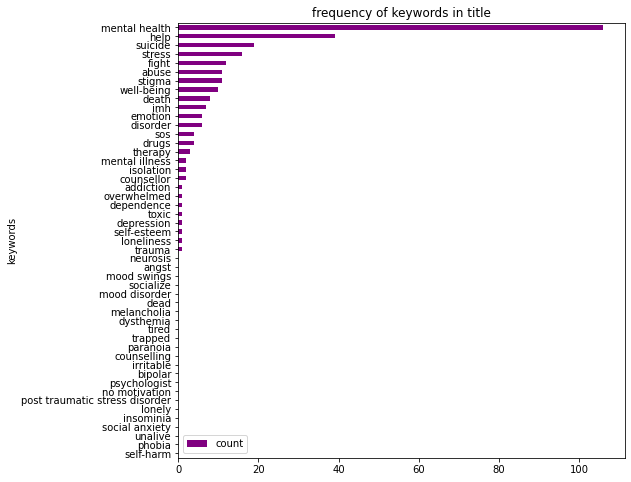

In [8]:
kws_graph(df_title)

In [9]:
#frequency of keywords in article content
df_content = kws_count(covid["content"],kws)
df_content

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,keywords,count
29,help,522
18,mental health,327
5,stress,313
20,emotion,171
40,well-being,151
10,death,127
7,isolation,124
15,counselling,117
9,abuse,102
0,depression,99


C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


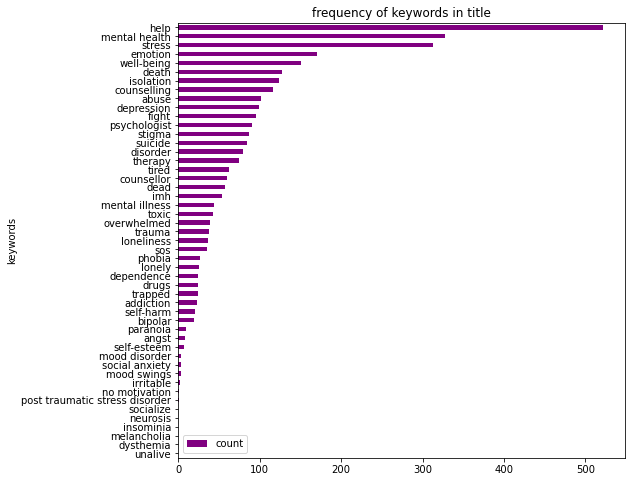

In [10]:
kws_graph(df_content)

In [13]:
#LDA viz for topic modelling
def lda_viz(df):
    stemmer = PorterStemmer()
    stop = stopwords.words('english')
    stop.extend(["also","said","say","like"])
    lem = WordNetLemmatizer()
    def process_news(text):
        corpus = []
        for news in text:
            # Remove HTML Tags
            try:
                news = html.document_fromstring(news).text_content()
            except:
                pass

            # Remove Hyperlinks
            news = re.sub('http\S+', ' ', news)

            # Remove non alphabets
            news = re.sub('[^a-zA-Z ]+', ' ', news)

            # Remove stopwords and short words
        for news in text:
            words=[w.lower() for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2 if (w not in stop)]

            corpus.append(words)
        return corpus
    def plot_lda_vis(lda_model, bow_corpus, dic):
        pyLDAvis.enable_notebook()
        vis = gensimvis.prepare(lda_model, bow_corpus, dic)
        return vis
    
    corpus = process_news(df)
    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    print(lda_model.show_topics())
    
    return plot_lda_vis(lda_model, bow_corpus, dic)


C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:17: DeprecationWarning: invalid escape sequence \S
<>:17: DeprecationWarning: invalid escape sequence \S
<ipython-input-13-e0da5dd5772a>:17: DeprecationWarning: invalid escape sequence \S
  news = re.sub('http\S+', ' ', news)


In [14]:
##LDA for titles of articles
viz_title = lda_viz(covid["title"])

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.028*"covid-19" + 0.012*"singapore" + 0.007*"worker" + 0.007*"case" + 0.006*"mask" + 0.006*"say" + 0.006*"new" + 0.006*"suicide" + 0.005*"man" + 0.005*"woman"'), (1, '0.027*"covid-19" + 0.008*"new" + 0.007*"singaporean" + 0.007*"worker" + 0.006*"case" + 0.006*"singapore" + 0.005*"firm" + 0.004*"job" + 0.004*"pandemic" + 0.004*"staff"'), (2, '0.040*"mental" + 0.033*"health" + 0.029*"covid-19" + 0.013*"singapore" + 0.012*"cna" + 0.011*"commentary" + 0.010*"worker" + 0.009*"pandemic" + 0.007*"new" + 0.006*"home"'), (3, '0.016*"covid-19" + 0.015*"breaker" + 0.014*"circuit" + 0.007*"woman" + 0.005*"help" + 0.005*"singapore" + 0.004*"youth" + 0.004*"singaporean" + 0.003*"jail" + 0.003*"business"')]


In [15]:
viz_title

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.132680  0.009038       1        1  33.943236
0      0.042097 -0.109061       2        1  25.790478
3      0.060928  0.090303       3        1  20.773374
1      0.029655  0.009721       4        1  19.492912, topic_info=        Term        Freq       Total Category  logprob  loglift
6     mental  106.000000  106.000000  Default  30.0000  30.0000
4     health   87.000000   87.000000  Default  29.0000  29.0000
40   breaker   22.000000   22.000000  Default  28.0000  28.0000
42   circuit   20.000000   20.000000  Default  27.0000  27.0000
977      cna   36.000000   36.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
21      face    3.107943    8.306618   Topic4  -6.0863   0.6520
144     year    3.725374   21.616693   Topic4  -5.9051  -0.1232
6     mental    3.809501  106.257000   Topic4  -5.8828  -1.6932
47      help    3.084738   23.948880   Topic4  -6.0938  -0.4143
4     health    2.927142   87.460494   Topic4  -6.1462  -1.7620

[289 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
145       2  0.261757    2020
145       3  0.523513    2020
145       4  0.130878    2020
156       3  0.724593  access
327       1  0.202858  action
...     ...       ...     ...
883       1  0.887158   young
883       4  0.147860   young
569       1  0.387875   youth
569       3  0.465450   youth
569       4  0.077575   youth

[440 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [16]:
viz_content = lda_viz(covid["content"])

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.008*"worker" + 0.007*"singapore" + 0.005*"covid-19" + 0.005*"time" + 0.005*"work" + 0.005*"home" + 0.005*"one" + 0.005*"people" + 0.004*"family" + 0.004*"case"'), (1, '0.006*"singapore" + 0.005*"time" + 0.005*"per" + 0.004*"â€\x9d" + 0.004*"cent" + 0.004*"covid-19" + 0.004*"year" + 0.004*"people" + 0.004*"read" + 0.004*"one"'), (2, '0.008*"covid-19" + 0.006*"singapore" + 0.005*"read" + 0.005*"case" + 0.004*"vaccine" + 0.004*"year" + 0.004*"may" + 0.003*"public" + 0.003*"â€\x9d" + 0.003*"vaccination"'), (3, '0.011*"mental" + 0.011*"health" + 0.009*"singapore" + 0.007*"people" + 0.004*"one" + 0.004*"support" + 0.004*"covid-19" + 0.004*"year" + 0.004*"need" + 0.004*"help"')]


In [17]:
viz_content

C:\Users\Lian\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.058782 -0.036051       1        1  36.976941
0      0.009481 -0.018708       2        1  32.620392
2     -0.087685 -0.011511       3        1  18.144020
1      0.019422  0.066270       4        1  12.258647, topic_info=          Term         Freq        Total Category  logprob  loglift
116     mental  2320.000000  2320.000000  Default  30.0000  30.0000
1815   vaccine   417.000000   417.000000  Default  29.0000  29.0000
454        per   953.000000   953.000000  Default  28.0000  28.0000
648       cent   809.000000   809.000000  Default  27.0000  27.0000
44    covid-19  2457.000000  2457.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
157      still   104.996557   898.754497   Topic4  -6.3108  -0.0481
162       take   102.791500   950.498966   Topic4  -6.3320  -0.1253
282       need   106.100283  1309.304757   Topic4  -6.3004  -0.4139
86         get   102.404338   966.234006   Topic4  -6.3358  -0.1455
69      family   103.032903  1243.005208   Topic4  -6.3297  -0.3913

[384 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
34500      4  0.933899  -level
3628       1  0.940308     /22
2367       4  0.899225    0.05
16707      4  0.903526     abf
3049       1  0.210052   abuse
...      ...       ...     ...
14855      2  0.954212   zakir
24401      1  0.213698     â€
24401      2  0.381548     â€
24401      3  0.203596     â€
24401      4  0.201265     â€

[787 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])